In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.metrics import confusion_matrix

## Описание задачи
Инсульт является 2-й ведущей причиной смерти во всем мире по данным (ВОЗ), на которую приходится примерно 11% от общего числа смертей.
Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения. Используя этот набор данных, научить модель прогнозировать инсульт.

## Загрузка данных

In [2]:
file = "healthcare-dataset-stroke-data.csv"
data_raw = pd.read_csv(file)

In [3]:
data_raw.shape

(5110, 12)

#### Выводим первые 5 строк таблицы

In [4]:
data_raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Скопируем данные

In [5]:
data = data_raw

## Обработка пропущенных значений

#### Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [6]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [7]:
data.median(axis = 0)

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [8]:
data.fillna(data.median(axis = 0), axis = 0 , inplace = True)

In [9]:
data["bmi"].head()

0    36.6
1    28.1
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [10]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Обработка номинальных признаков

#### Обработаем бинарный признак (заменяем на числовой):

In [11]:
data['ever_married']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object

In [12]:
pd.factorize(data['ever_married'])[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
data['ever_married'] = pd.factorize(data['ever_married'])[0]

In [14]:
data['ever_married']

0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: ever_married, Length: 5110, dtype: int64

In [15]:
data['gender']

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [16]:
data_dummies = pd.get_dummies(data['gender'])

In [17]:
data_dummies.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


#### Присоединяем к таблице

In [18]:
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['gender'], axis=1)

In [19]:
data.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other
0,9046,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1,0,1,0
1,51676,61.0,0,0,0,Self-employed,Rural,202.21,28.1,never smoked,1,1,0,0
2,31112,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1,0,1,0
3,60182,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,1,1,0,0
4,1665,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,1,1,0,0


#### Обрабатываем небинарные признаки:

In [20]:
data_dummies = pd.get_dummies(data['work_type'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['work_type'], axis=1)

data_dummies = pd.get_dummies(data['Residence_type'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['Residence_type'], axis=1)

data_dummies = pd.get_dummies(data['smoking_status'])
data = pd.concat((data, data_dummies), axis=1)
data = data.drop(['smoking_status'], axis=1)

data.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,0,228.69,36.6,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,0,202.21,28.1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,0,105.92,32.5,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,0,171.23,34.4,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,0,174.12,24.0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


## Нормализация

#### Выполним стандартизацию всех признаков:

In [21]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [22]:
data_stand

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Female,Male,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,-1.298185,1.051331,-0.328570,4.184622,-0.723813,2.706111,1.004988,4.417948,-1.189394,1.189873,...,-0.06575,0.864212,-0.436838,-0.394074,-0.983983,0.983983,-0.657946,2.184737,-0.766699,-0.427271
1,0.716301,0.785993,-0.328570,-0.238923,-0.723813,2.121351,-0.098971,4.417948,0.840600,-0.840261,...,-0.06575,-1.156897,2.288731,-0.394074,1.016078,-1.016078,-0.657946,-0.457631,1.304037,-0.427271
2,-0.255453,1.626231,-0.328570,4.184622,-0.723813,-0.005028,0.472490,4.417948,-1.189394,1.189873,...,-0.06575,0.864212,-0.436838,-0.394074,1.016078,-1.016078,-0.657946,-0.457631,1.304037,-0.427271
3,1.118254,0.255317,-0.328570,-0.238923,-0.723813,1.437217,0.719257,4.417948,0.840600,-0.840261,...,-0.06575,0.864212,-0.436838,-0.394074,-0.983983,0.983983,-0.657946,-0.457631,-0.766699,2.339975
4,-1.646975,1.582008,3.042899,-0.238923,-0.723813,1.501038,-0.631469,4.417948,0.840600,-0.840261,...,-0.06575,-1.156897,2.288731,-0.394074,1.016078,-1.016078,-0.657946,-0.457631,1.304037,-0.427271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864005,1.626231,3.042899,-0.238923,-0.723813,-0.494609,-0.098971,-0.226305,0.840600,-0.840261,...,-0.06575,0.864212,-0.436838,-0.394074,-0.983983,0.983983,-0.657946,-0.457631,1.304037,-0.427271
5106,0.394825,1.670454,-0.328570,-0.238923,-0.723813,0.420734,1.446571,-0.226305,0.840600,-0.840261,...,-0.06575,-1.156897,2.288731,-0.394074,-0.983983,0.983983,-0.657946,-0.457631,1.304037,-0.427271
5107,-0.793642,-0.363806,-0.328570,-0.238923,-0.723813,-0.511393,0.225723,-0.226305,0.840600,-0.840261,...,-0.06575,-1.156897,2.288731,-0.394074,1.016078,-1.016078,-0.657946,-0.457631,1.304037,-0.427271
5108,0.048492,0.343763,-0.328570,-0.238923,-0.723813,1.328127,-0.423665,-0.226305,-1.189394,1.189873,...,-0.06575,0.864212,-0.436838,-0.394074,1.016078,-1.016078,-0.657946,2.184737,-0.766699,-0.427271


## Разбиение данных

#### Для классификации уберем id

In [23]:
data_stand.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'Female', 'Male', 'Other',
       'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children',
       'Rural', 'Urban', 'Unknown', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [24]:
X = data_stand.drop(['stroke', 'id'], axis=1)
y = data['stroke']

#### Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3832, 1278)

### kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
knn

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [29]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [30]:
print(err_train, err_test)

0.04305845511482255 0.06025039123630673


In [31]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[1197    1]
 [  76    4]]


###  Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
err_train = np.mean(y_train != forest.predict(X_train))
err_test  = np.mean(y_test  != forest.predict(X_test))
print(err_train, err_test)

0.00026096033402922753 0.06338028169014084


### Extremely Randomized Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
ert = ExtraTreesClassifier()
ert.fit(X_train, y_train)
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))
print(err_train, err_test)

0.0 0.06729264475743349


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))
print(err_train, err_test)

0.0 0.09859154929577464


### SVM

In [35]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
err_train = np.mean(y_train != clf.predict(X_train))
err_test  = np.mean(y_test  != clf.predict(X_test))
print(err_train, err_test)

0.04410229645093946 0.06259780907668232


## Классификация с помощью нейронной сети

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
%%time

err_train = []
err_test = []
score_train = []
score_test = []

sequence = np.logspace(-3, 2, 21)

for alpha in sequence:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=10000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test != y_test_predict))
    
    score_train.append(mlp_model.score(X_train, y_train))
    score_test.append(mlp_model.score(X_test, y_test))

Wall time: 49.5 s


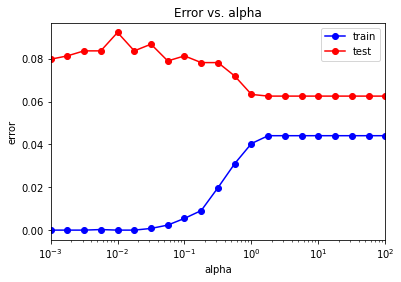

In [38]:
plt.semilogx(sequence, err_train, 'b-o', label = 'train')
plt.semilogx(sequence, err_test, 'r-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

#### Рассмотрим как у нас менялась метрика в зависимости от гиперпараметра:

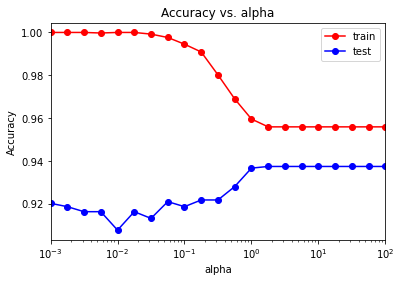

In [39]:
plt.semilogx(sequence, score_train, 'r-o', label = 'train')
plt.semilogx(sequence, score_test, 'b-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [40]:
min_train_err = np.min(err_train)
min_test_err = np.min(err_test)
print(min_train_err, min_test_err)

0.0 0.06259780907668232


Оптимальное значение alpha:

In [41]:
opt_alpha = sequence[err_test == min_test_err]
opt_alpha = opt_alpha[0]
print("Оптимальное значение:", opt_alpha)

Оптимальное значение: 1.7782794100389228


Повторим обучение

In [42]:
mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)


y_train_predict = mlp_model.predict(X_train)
y_test_predict = mlp_model.predict(X_test)

print("Train:", np.mean(y_train != y_train_predict))
print("Test:", np.mean(y_test != y_test_predict))

Train: 0.04410229645093946
Test: 0.06259780907668232


### Найдем оптимальное число нейронов

In [43]:
sequence = np.linspace(1, 100, 60, endpoint=True, dtype=int)

In [44]:
opt_alpha

1.7782794100389228

In [45]:
%%time

err_train = []
err_test = []
score_train = []
score_test = []

sequence = np.linspace(1, 100, 60, endpoint=True, dtype=int)

for number in sequence:
    mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (number,), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test != y_test_predict))
    
    score_train.append(mlp_model.score(X_train, y_train))
    score_test.append(mlp_model.score(X_test, y_test))

Wall time: 44.5 s


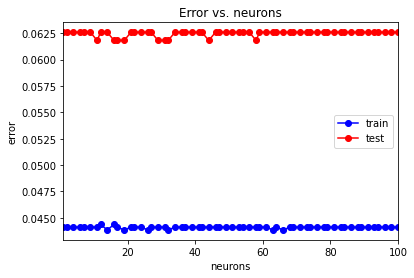

In [46]:
plt.plot(sequence, err_train, 'b-o', label = 'train')
plt.plot(sequence, err_test, 'r-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

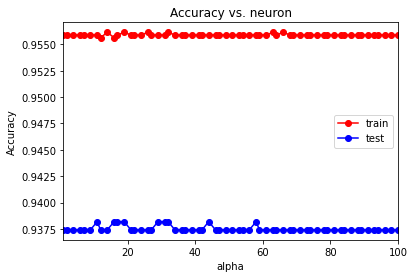

In [47]:
plt.plot(sequence, score_train, 'r-o', label = 'train')
plt.plot(sequence, score_test, 'b-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Accuracy vs. neuron')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
min_train_err = np.min(err_train)
min_test_err = np.min(err_test)
print(min_train_err, min_test_err)

0.04384133611691023 0.061815336463223784


In [49]:
opt_first_layer = sequence[err_test == min_test_err]
opt_first_layer = opt_first_layer[0]
print("Оптимальное значение:", opt_first_layer)

Оптимальное значение: 11


#### Повторим обучение

In [50]:
opt_first_layer

11

In [51]:
mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (opt_first_layer,), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict = mlp_model.predict(X_test)
    
print("Train:", np.mean(y_train != y_train_predict))
print("Test:", np.mean(y_test != y_test_predict))

Train: 0.04410229645093946
Test: 0.061815336463223784


### Найдем оптимальное число нейронов на втором слое

In [52]:
%%time

err_train = []
err_test = []
score_train = []
score_test = []

sequence = np.linspace(1, 100, 60, endpoint=True, dtype=int)

for number in sequence:
    mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (opt_first_layer,number), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test != y_test_predict))
    
    score_train.append(mlp_model.score(X_train, y_train))
    score_test.append(mlp_model.score(X_test, y_test))

Wall time: 1min 15s


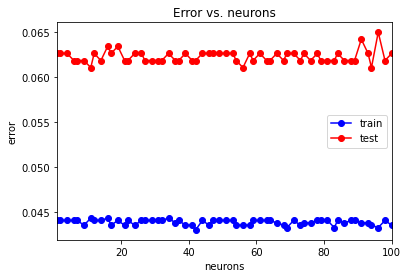

In [53]:
plt.plot(sequence, err_train, 'b-o', label = 'train')
plt.plot(sequence, err_test, 'r-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

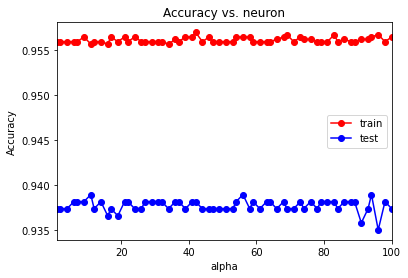

In [54]:
plt.plot(sequence, score_train, 'r-o', label = 'train')
plt.plot(sequence, score_test, 'b-o', label = 'test')
plt.xlim([np.min(sequence), np.max(sequence)])
plt.title('Accuracy vs. neuron')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [55]:
min_train_err = np.min(err_train)
min_test_err = np.min(err_test)
print(min_train_err, min_test_err)

0.04305845511482255 0.06103286384976526


In [56]:
opt_second_layer = sequence[err_test == min_test_err]
opt_second_layer = opt_second_layer[0]
print("Оптимальное значение:", opt_second_layer)

Оптимальное значение: 11


##### Повторим обучение

In [57]:
mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (opt_first_layer, opt_second_layer), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict = mlp_model.predict(X_test)
    
print("Train:", np.mean(y_train != y_train_predict))
print("Test:", np.mean(y_test != y_test_predict))

Train: 0.044363256784968684
Test: 0.06103286384976526


### Выводы

Датасет несбалансированный. В датасете большинство людей не с инсультом (5% людей с инсультом).
<br> Обучение проводилось на 3832 пациентах, а тестировалось на 1278.
<br> При 7 соседях для kNN ошибка для тестовой выборки получается наименьшей.
<br> Ошибки:
<br> kNN: train = 0.04305845511482255, test = 0.06025039123630673
<br> random forest: train = 0.00026096033402922753, test = 0.06259780907668232
<br> Extremely Randomized Trees: train = 0.0, test = 0.06572769953051644
<br> Decision Tree: train = 0.0, test = 0.10172143974960876
<br> SVM: train = 0.04410229645093946, test = 0.06259780907668232
    
#### Нейронные сети:

Ошибка на тренировочной выборке: 
<br> Ошибка на тестовой выборке: 
<br> Найдены оптимальные значения параметров: alpha = 1.7782794100389228, число нейронов на первом слое = 11, число нейронов на втором слое = 11.

In [58]:
from imblearn.over_sampling import SMOTE

<AxesSubplot:xlabel='stroke', ylabel='count'>

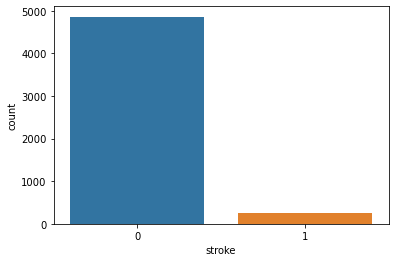

In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
sns.countplot(x = 'stroke', data = data)


In [60]:
sm = SMOTE(sampling_strategy=0.2)

X_new, y_new = sm.fit_resample(X_train, y_train.values.ravel())
X_new, y_new = RandomUnderSampler(sampling_strategy=0.2).fit_resample(X_new, y_new)
X_new = pd.DataFrame(X_new)
y_new = pd.DataFrame(y_new)
print(X_train.shape)
print(X_new.shape,y_new.shape)

(3832, 20)
(4392, 20) (4392, 1)


### kNN

In [61]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_new, y_new.values.ravel())
err_train  = np.mean(y_new.values.ravel()  != knn.predict(X_new))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)
print(confusion_matrix(y_test, knn.predict(X_test)))

0.07832422586520947 0.09859154929577464
[[1134   64]
 [  62   18]]


###  Random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_new, y_new.values.ravel())
err_train = np.mean(y_new.values.ravel() != forest.predict(X_new))
err_test  = np.mean(y_test  != forest.predict(X_test))
print(err_train, err_test)

0.0 0.06651017214397496


### Extremely Randomized Trees

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
ert = ExtraTreesClassifier()
ert.fit(X_new, y_new.values.ravel())
err_train = np.mean(y_new.values.ravel() != ert.predict(X_new))
err_test  = np.mean(y_test  != ert.predict(X_test))
print(err_train, err_test)

0.0 0.06964006259780908


### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_new, y_new.values.ravel())
err_train = np.mean(y_new.values.ravel() != dtc.predict(X_new))
err_test  = np.mean(y_test  != dtc.predict(X_test))
print(err_train, err_test)

0.0 0.12284820031298904


### SVM

In [65]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_new, y_new.values.ravel())
err_train = np.mean(y_new.values.ravel() != clf.predict(X_new))
err_test  = np.mean(y_test  != clf.predict(X_test))
print(err_train, err_test)

0.08879781420765027 0.08059467918622848


### NN

In [66]:
mlp_model = MLPClassifier(alpha = opt_alpha, hidden_layer_sizes = (opt_first_layer, opt_second_layer), 
                              solver = 'lbfgs', activation = 'logistic',
                              max_iter=1000, random_state = 42)
mlp_model.fit(X_new, y_new.values.ravel())

y_train_predict = mlp_model.predict(X_new)
y_test_predict = mlp_model.predict(X_test)
    
print("Train:", np.mean(y_new.values.ravel() != y_train_predict))
print("Test:", np.mean(y_test != y_test_predict))

Train: 0.072632058287796
Test: 0.09546165884194054


In [67]:
tmp1 = X_new
tmp2 = X_test

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_new = tmp1
X_test = tmp2

In [69]:
X_new = pca.fit_transform(X_new)
X_test = pca.fit_transform(X_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_new, y_new.values.ravel())
err_train  = np.mean(y_new.values.ravel()  != knn.predict(X_new))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.07832422586520947 0.1619718309859155
